In [ ]:
# Logistic Regression


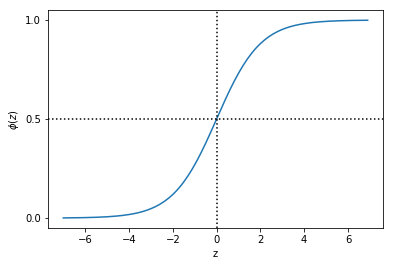

In [2]:
# 画一条sigmoid曲线

import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.yticks([0.0, 0.5, 1.0])
plt.axvline(0.0, color = 'k', ls = 'dotted')
# plt.axhspan(0.0, 1.0, facecolor = "1.0", alpha =1.0, ls = 'dotted')
plt.axhline(y = 0.5, ls = 'dotted', color = 'k')
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()
           

In [8]:
# 准备数据
# 引入一个练习的dataset
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
# 把数据划分成训练集和验证集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)
# standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
# 绘出决策域
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X,y,classifier, 
                          test_idx=None,resolution=0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() +1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha = 0.8, c = cmap(idx),
                   marker = markers[idx], label = cl)
    # highlight test samples
    if test_idx:
        x_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:, 1], c ='k',
                   alpha = 1.0, linewidth =1, marker = 'o',
                   s= 55, label = 'test set')


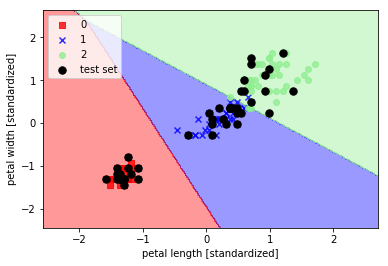

In [9]:
# LR部分
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1000.0, random_state = 0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, 
                      classifier = lr,
                      test_idx = range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()


In [10]:
lr.predict_proba(X_test_std[0,:]) #这一句没搞定，不知道什么原因

ValueError: Expected 2D array, got 1D array instead:
array=[0.70793846 1.50872803].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

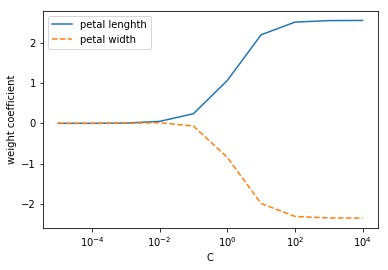

In [11]:
# 引入L2正则，看不同C的强度对权重的影响
weights, params = [],[]
for c in np.arange(-5,5,dtype=float):
    lr = LogisticRegression(C = 10**c, random_state = 0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
plt.plot(params, weights[:,0],
        label = 'petal lenghth')
plt.plot(params, weights[:,1],
       linestyle = '--',
       label = 'petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()